In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
from citipy import citipy
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

627

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=650b800a6f4310e332dc5228b1492c28


In [7]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 65.43,
  'feels_like': 64.9,
  'temp_min': 60.08,
  'temp_max': 68.61,
  'pressure': 1008,
  'humidity': 69},
 'visibility': 10000,
 'wind': {'speed': 16.11, 'deg': 240, 'gust': 24.16},
 'clouds': {'all': 75},
 'dt': 1645637851,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1645615758,
  'sunset': 1645655174},
 'timezone': -18000,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [8]:
# Get the JSON data.
boston_data = city_weather.json()

In [9]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 68.61 69 75 16.11


In [10]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | port alfred
Processing Record 2 of Set 13 | lebu
Processing Record 3 of Set 13 | pedernales
Processing Record 4 of Set 13 | olga
Processing Record 5 of Set 13 | port hawkesbury
Processing Record 6 of Set 13 | leningradskiy
Processing Record 7 of Set 13 | cape town
Processing Record 8 of Set 13 | hobart
Processing Record 9 of Set 13 | provideniya
Processing Record 10 of Set 13 | mentok
City not found. Skipping...
Processing Record 11 of Set 13 | constitucion
Processing Record 12 of Set 13 | qaanaaq
Processing Record 13 of Set 13 | hami
Processing Record 14 of Set 13 | kodinsk
Processing Record 15 of Set 13 | thompson
Processing Record 16 of Set 13 | longyearbyen
Processing Record 17 of Set 13 | jamestown
Processing Record 18 of Set 13 | maryville
Processing Record 19 of Set 13 | rikitea
Processing Record 20 of Set 13 | yefimovskiy
City not found. Skipping...
Processing Record 21 of Set 13 | hilo


Processing Record 30 of Set 16 | alta
Processing Record 31 of Set 16 | nizhneyansk
City not found. Skipping...
Processing Record 32 of Set 16 | vaini
Processing Record 33 of Set 16 | taolanaro
City not found. Skipping...
Processing Record 34 of Set 16 | high level
Processing Record 35 of Set 16 | pucara
Processing Record 36 of Set 16 | yunjinghong
City not found. Skipping...
Processing Record 37 of Set 16 | udachnyy
Processing Record 38 of Set 16 | chokurdakh
Processing Record 39 of Set 16 | moissala
Processing Record 40 of Set 16 | altay
Processing Record 41 of Set 16 | pully
Processing Record 42 of Set 16 | bandar-e anzali
Processing Record 43 of Set 16 | russell
Processing Record 44 of Set 16 | ukiah
Processing Record 45 of Set 16 | pagudpud
Processing Record 46 of Set 16 | gwembe
Processing Record 47 of Set 16 | mizan teferi
Processing Record 48 of Set 16 | tautira
Processing Record 49 of Set 16 | amderma
City not found. Skipping...
Processing Record 50 of Set 16 | urdzhar
City not

Processing Record 12 of Set 20 | kampot
Processing Record 13 of Set 20 | tilichiki
Processing Record 14 of Set 20 | sitka
Processing Record 15 of Set 20 | aflu
City not found. Skipping...
Processing Record 16 of Set 20 | pisco
Processing Record 17 of Set 20 | port hedland
Processing Record 18 of Set 20 | dunedin
Processing Record 19 of Set 20 | lompoc
Processing Record 20 of Set 20 | senekal
Processing Record 21 of Set 20 | christchurch
Processing Record 22 of Set 20 | northam
Processing Record 23 of Set 20 | kruisfontein
Processing Record 24 of Set 20 | boffa
Processing Record 25 of Set 20 | sorland
Processing Record 26 of Set 20 | mwinilunga
Processing Record 27 of Set 20 | talara
Processing Record 28 of Set 20 | buqayq
City not found. Skipping...
Processing Record 29 of Set 20 | nantucket
Processing Record 30 of Set 20 | bolshegrivskoye
City not found. Skipping...
Processing Record 31 of Set 20 | moussoro
Processing Record 32 of Set 20 | lorengau
Processing Record 33 of Set 20 | luf

Processing Record 46 of Set 23 | iralaya
Processing Record 47 of Set 23 | saint-joseph
Processing Record 48 of Set 23 | aklavik
Processing Record 49 of Set 23 | japura
Processing Record 50 of Set 23 | xiongyue
Processing Record 1 of Set 24 | fuerte olimpo
Processing Record 2 of Set 24 | renukut
Processing Record 3 of Set 24 | bintulu
Processing Record 4 of Set 24 | mount isa
Processing Record 5 of Set 24 | olinda
Processing Record 6 of Set 24 | bundaberg
Processing Record 7 of Set 24 | ikom
Processing Record 8 of Set 24 | jaisalmer
Processing Record 9 of Set 24 | grand river south east
City not found. Skipping...
Processing Record 10 of Set 24 | ondorhaan
City not found. Skipping...
Processing Record 11 of Set 24 | ruidoso
Processing Record 12 of Set 24 | hirado
Processing Record 13 of Set 24 | buarcos
Processing Record 14 of Set 24 | hailar
Processing Record 15 of Set 24 | mizdah
Processing Record 16 of Set 24 | flinders
Processing Record 17 of Set 24 | holme
Processing Record 18 of S

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Port Alfred,-33.5906,26.8910,75.06,93,16,15.01,ZA,2022-02-23 17:41:35
1,Lebu,-37.6167,-73.6500,62.31,85,70,14.72,CL,2022-02-23 17:41:36
2,Pedernales,18.0384,-71.7440,81.03,63,5,8.41,DO,2022-02-23 17:41:36
3,Olga,43.7444,135.2892,15.48,62,51,11.97,RU,2022-02-23 17:41:37
4,Port Hawkesbury,45.6169,-61.3485,50.92,95,100,3.00,CA,2022-02-23 17:41:37
5,Leningradskiy,69.3833,178.4167,-30.26,96,62,2.10,RU,2022-02-23 17:41:38
6,Cape Town,-33.9258,18.4232,72.01,69,0,19.57,ZA,2022-02-23 17:38:08
7,Hobart,-42.8794,147.3294,66.06,78,82,6.91,AU,2022-02-23 17:41:38
8,Provideniya,64.3833,-173.3000,7.25,91,100,21.50,RU,2022-02-23 17:41:39
9,Constitucion,-35.3333,-72.4167,64.67,77,63,17.87,CL,2022-02-23 17:41:39


In [13]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Port Alfred,ZA,2022-02-23 17:41:35,-33.5906,26.8910,75.06,93,16,15.01
1,Lebu,CL,2022-02-23 17:41:36,-37.6167,-73.6500,62.31,85,70,14.72
2,Pedernales,DO,2022-02-23 17:41:36,18.0384,-71.7440,81.03,63,5,8.41
3,Olga,RU,2022-02-23 17:41:37,43.7444,135.2892,15.48,62,51,11.97
4,Port Hawkesbury,CA,2022-02-23 17:41:37,45.6169,-61.3485,50.92,95,100,3.00
...,...,...,...,...,...,...,...,...,...
561,Neryungri,RU,2022-02-23 17:46:48,56.6709,124.6491,3.27,99,93,2.44
562,Pocatello,US,2022-02-23 17:41:59,42.8713,-112.4455,12.85,63,75,7.00
563,Marawi,PH,2022-02-23 17:46:49,7.9986,124.2928,64.65,90,88,1.21
564,Tooele,US,2022-02-23 17:46:49,40.5308,-112.2983,23.09,86,100,16.11


In [2]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

NameError: name 'city_data_df' is not defined

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

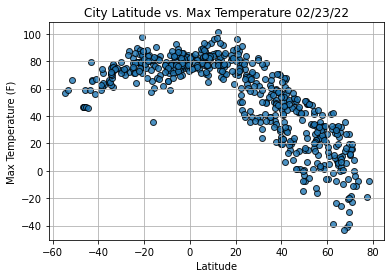

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

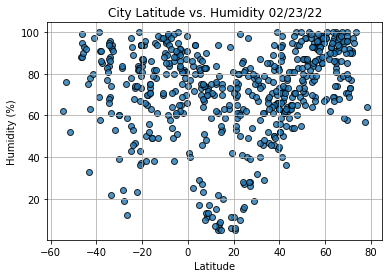

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

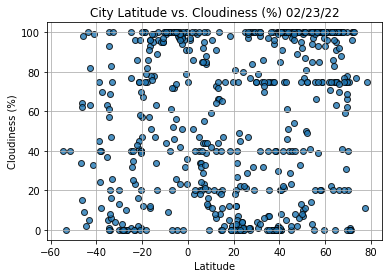

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

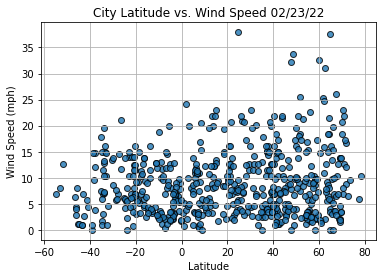

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [22]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [23]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

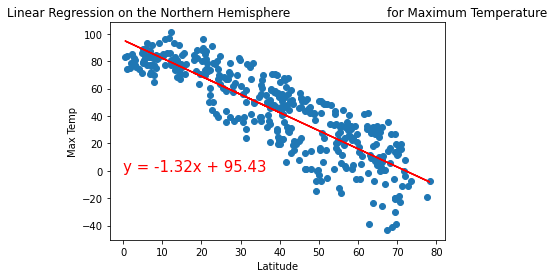

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(0,0))

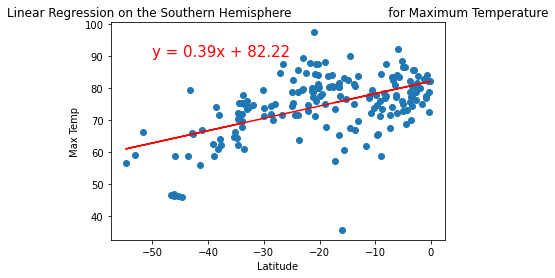

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

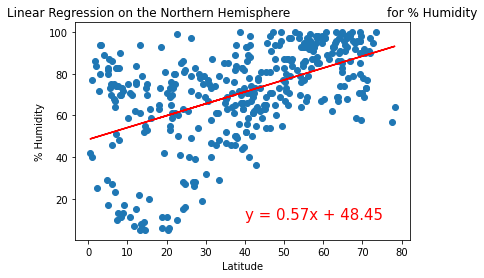

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

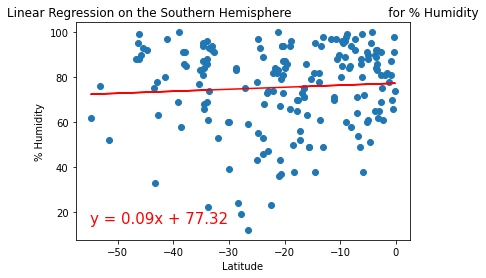

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-55,15))

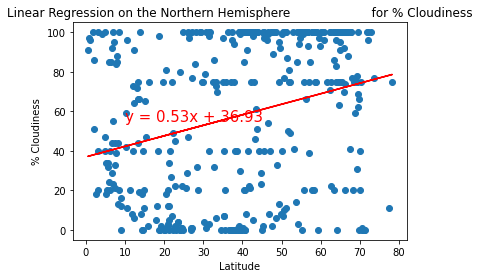

In [37]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values,
                   'Linear Regression on the Northern Hemisphere \
                    for % Cloudiness', '% Cloudiness',(10,55))

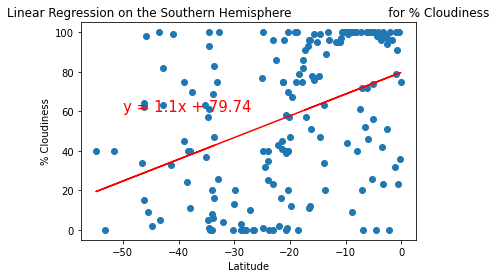

In [39]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

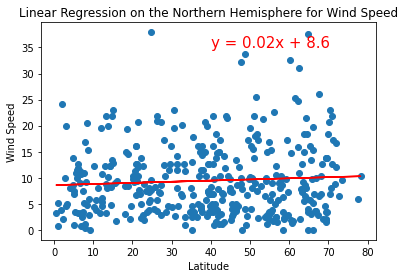

In [49]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

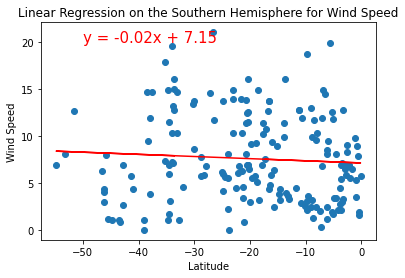

In [48]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,20))